# King County Housing Prediction Using Regression

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#set display parameters
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)


In [107]:
# import datafiles
training = pd.read_csv("datasets/kc_house_data_train.csv", index_col = 0)
imputed = pd.read_csv("datasets/bedroomsfilled.csv", index_col = 0)
extra = pd.read_csv("datasets/zip_code_extra_data_fixed.csv", index_col = 0)
date = pd.read_csv("datasets/date.csv", index_col = 0)

#### Analyzing the shapes of dataframe and familiarizing myself with the sales dataframe. The Sales dataframe will be the foundation of the dataframe which will be used to make predictions. Along the way, sales might be renamed as features get added into it. 

In [108]:
print(training.shape) #training and testing df to create a model for prediction
print(imputed.shape) #missing data for 12 rows (no bedrooms)
print(extra.shape) # extra data on the 70 zipcodes from https://www.unitedstateszipcodes.org/
print(date.shape) # date from the training datafile. 
sales = training.copy()
prices=pd.DataFrame(sales["price"])
sales.head()

(17290, 21)
(12, 21)
(70, 54)
(17290, 1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [109]:
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


In [110]:
sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [111]:
corr = sales.corr()  # checking correlation

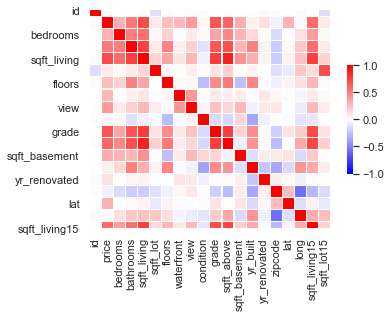

In [112]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5})

In [113]:
#Dropping "id" since it does not affect the price. 
#"Date" has already been extracted and will be reintroduced later 
sales.drop(columns=["id","date"], inplace = True) 

In [114]:
sales.shape

(17290, 19)

### Conducting a train-test split to see how the current model holds up (Naive model)
##### Naive model: R_square of 0.702778 and RMSE of 198865.0295

In [12]:
X = sales.drop(columns = "price")
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction


r_square = metrics.r2_score(y_test, y_pred)
original_mse = metrics.mean_squared_error(y_test, y_pred)


print("R Square               : ", r_square)
print("Original Root Mean Squared Error: ", original_mse**(1/2))

R Square               :  0.7027786929887444
Original Root Mean Squared Error:  198865.02952198777


##### Setting a multicolinearity cap. 
This function will only return the interaction if there is a colinearity of greater than 0.90. Seems like there is no interaction in the sales dataframe which results in a colinearity greater than 0.90.

In [115]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc'] #correlation column
    df.drop_duplicates(inplace=True)
    return df[(df.cc>.9) & (df.cc<1) ]

multicolinear_features(sales) #checking for multicolinearity

,cc
pairs,


##### Checking and adjusting the outliers: 

In [14]:
sales[sales["bedrooms"]== 0]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [15]:
sales["bedrooms"].max()

33

In [16]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [18]:
imputed #dataframe with information on the missing bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,4,2.50,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,5,3.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,1222029077,20141029T000000,265000.0,1,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,7849202190,20141223T000000,235000.0,3,2.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,2569500210,20141117T000000,339950.0,4,3.00,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,3918400017,20150205T000000,380000.0,3,2.50,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,1453602309,20140805T000000,288000.0,2,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,2954400190,20140624T000000,1295650.0,4,4.50,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,1,0.75,290,20875,1.0,0,0,1,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,20140925T000000,240000.0,4,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [19]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [116]:
 # dropping 2 columns to match sales and id does not really affect the model.
imputed.drop(columns=["id","date"], inplace = True)          
imputed.shape

(12, 19)

#### Merging Bedroom data for 12 rows and removing bedroom outliers

In [117]:
def filled_data(df,df2):
    index=df.loc[df.bedrooms == 0].index.to_list()
    df.drop(df.index[[index]], inplace=True)
    frames= [df, df2]
    train = pd.concat(frames)
    return train


sales=filled_data(sales, imputed)

In [118]:
print(sales.shape)


(17290, 19)


In [26]:
# removes outliers - bedrooms  > 10

def cap_max(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x > n:
        return data[column].median()
    else:
        return x
sales["bedrooms"]= sales["bedrooms"].apply(lambda x: cap_max(x,10,sales,"bedrooms"))   

In [120]:
def cap_min(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x == n:
        return 1
    else:
        return x

In [121]:
sales["bathrooms"]= sales["bathrooms"].apply(lambda x: cap_min(x,0,sales,"bathrooms"))  


In [122]:
sales.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Checking the effect of the new data additions

In [124]:
X = sales.drop(columns = ["price"])
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction


r_square = metrics.r2_score(y_test, y_pred) # r square value
mse = metrics.mean_squared_error(y_test, y_pred) # mse value



print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2)) # prints RMSE

R Square               :  0.6907298013929892
Root Mean Squared Error:  209317.3118963744


## Based on the current features, we have incereased the RMSE value and decreased the R square by 0.01. 

#### Adding More Data

In [127]:
# extra datafile consist of extra information from the cencus by zipcode. 
print(sales.shape, extra.shape)

(17290, 19) (70, 54)


In [128]:
training_data = pd.merge(sales, extra, how='right', on='zipcode')


In [129]:
training_data.shape

(17290, 73)

In [130]:
training_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'full_time_earnings',
       'part_time_earnings', 'no_earnings', 'car_truck_van',
       'public_transportation', 'taxi', 'motorcycle', 'bike_walk_other',
       'work_home', 'less_than_hs', 'high_school_grad', 'associates',
       'bachelors', 'masters', 'professional_school_degree', 'doctorate',
       'public_school_enrollment', 'private_school_enrollment',
       'no_school_enrollment', 'for_rent', 'rented_and_unoccupied',
       'for_sale_only', 'sold_and_unoccupied', 'seasonal_or_rec_use',
       'migrant_worker_housing', 'vacant_other_reasons',
       'in_occupied_housing_units', 'adult_correctional_facility',
       'juvenile_facilities', 'nursing_facilities', 'other_institutional',
       'military_quarters', 'other_nonin

In [131]:
training_data = pd.merge(training_data, date, how = "left", left_index=True, right_index=True)
training_data["month"] = pd.DatetimeIndex(training_data["date"]).month

training_data.drop(columns=["date"], inplace = True)
training_data.shape

(17290, 74)

In [40]:
training_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'full_time_earnings',
       'part_time_earnings', 'no_earnings', 'car_truck_van',
       'public_transportation', 'taxi', 'motorcycle', 'bike_walk_other',
       'work_home', 'less_than_hs', 'high_school_grad', 'associates',
       'bachelors', 'masters', 'professional_school_degree', 'doctorate',
       'public_school_enrollment', 'private_school_enrollment',
       'no_school_enrollment', 'for_rent', 'rented_and_unoccupied',
       'for_sale_only', 'sold_and_unoccupied', 'seasonal_or_rec_use',
       'migrant_worker_housing', 'vacant_other_reasons',
       'in_occupied_housing_units', 'adult_correctional_facility',
       'juvenile_facilities', 'nursing_facilities', 'other_institutional',
       'military_quarters', 'other_nonin

In [41]:
# Adding Geodata
from geopy.distance import geodesic
downtown = (47.609862, -122.342056) 
training_data['coords'] = tuple(zip(training_data['lat'],training_data['long']))
x = training_data['coords'].apply(lambda x: geodesic(downtown,x))
training_data['miles_from_downtown'] = x.astype(str).str[:-3].astype(float)
training_data.drop(columns = "coords", inplace = True)
training_data.shape


(17290, 75)

#### Checking the numbers again on the new Dataframe. 

In [42]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [43]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)


print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8049958043746144
Root Mean Squared Error:  154318.41442616508


## We see that the new features that have been introduced have improvedRMSE score and the R square tremendiously. 

In [45]:
training_data.shape

(17290, 75)

In [46]:
corra=training_data.corr()

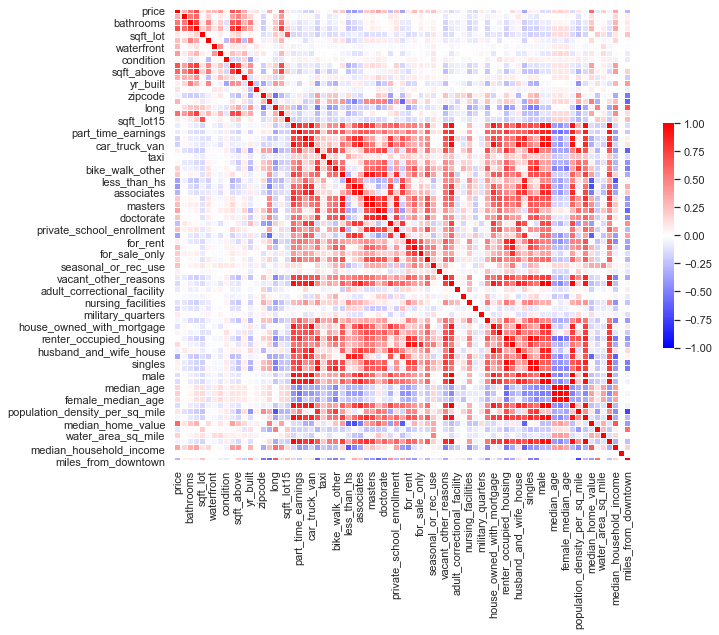

In [132]:
# checking correlation of the new features
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)


sns.heatmap(corra, cmap="bwr", vmax=1,vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5});

# Statistics to Determine the features

In [133]:
# checking the age of the house
training_data["house_years"] = abs(training_data["yr_renovated"]-training_data["yr_built"])

training_data["house_age_2015"] = 2015 - training_data["yr_built"] # age of the house by 25 with or without renovation. 


In [134]:
training_data.drop(columns= ["yr_built", "yr_renovated"], inplace = True)

In [135]:
training_data.shape

(17290, 74)

In [136]:
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [137]:
training.floors.value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [138]:
formula = 'price~C(floors)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                 sum_sq       df           F  PR(>F)
C(floors)  2.059096e+14      5.0  323.010561     0.0
Residual   2.203607e+15  17284.0         NaN     NaN


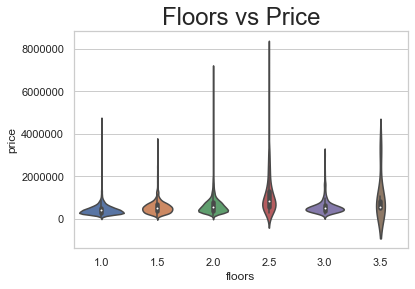

In [139]:
floors = training_data.groupby("floors").price.mean()
#floors.plot(kind=)
ax = sns.violinplot(x="floors", y="price", data=training_data)
plt.title("Floors vs Price", fontsize = 24)
plt.savefig('images/floors_vs_price.png', bbox_inches = "tight");

In [140]:
formula = 'price~C(grade)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                sum_sq       df            F  PR(>F)
C(grade)  1.274417e+15     11.0  1763.511029     0.0
Residual  1.135100e+15  17278.0          NaN     NaN


In [141]:
training_data.groupby("grade").price.mean()

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64

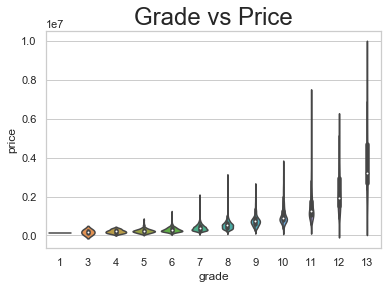

In [142]:
ax = sns.violinplot(x="grade", y="price", data=training_data)
plt.title("Grade vs Price", fontsize = 24)
plt.savefig('images/grade_vs_price.png', bbox_inches = "tight");

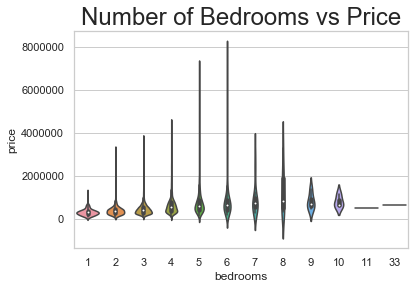

In [143]:
ax = sns.violinplot(x="bedrooms", y="price", data=training_data)
plt.title("Number of Bedrooms vs Price", fontsize = 24)
plt.savefig('images/bedroom_vs_price.png', bbox_inches = "tight");

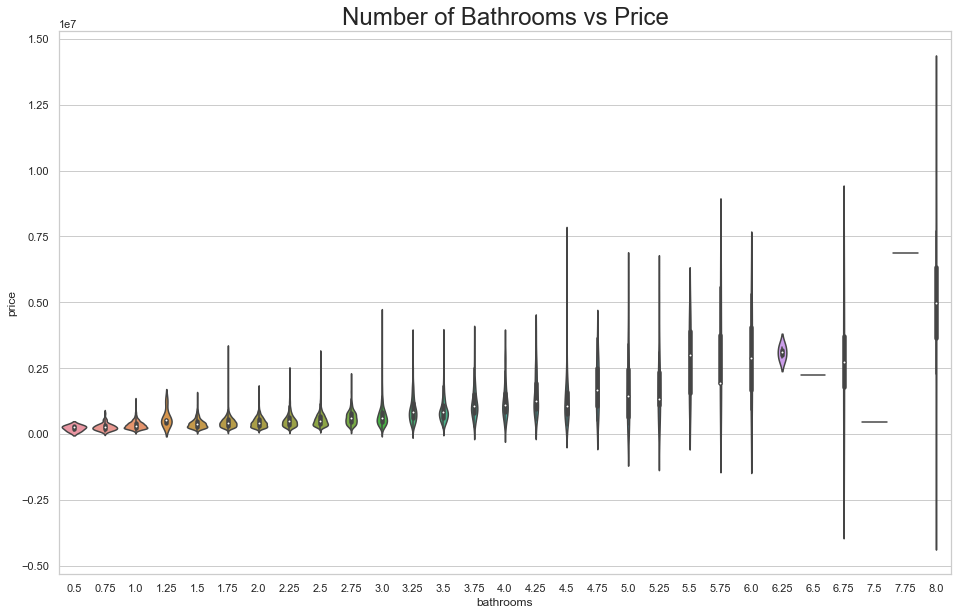

In [144]:
fix, ax = plt.subplots(figsize = (16,10))
ax = sns.violinplot(x="bathrooms", y="price", data=training_data)
plt.title("Number of Bathrooms vs Price", fontsize = 24)
plt.savefig('images/bathroom_vs_price.png', bbox_inches = "tight");

In [145]:
formula = 'price~C(no_earnings)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                      sum_sq       df           F  PR(>F)
C(no_earnings)  9.673067e+14     69.0  167.386197     0.0
Residual        1.442210e+15  17220.0         NaN     NaN


In [157]:
zipcode_price_mean=pd.DataFrame(training_data.groupby(["zipcode"]).price.mean())

In [147]:
training_data.shape

(17290, 74)

#### Conducting another base model test to see how the new features have affectted the model

In [161]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)


multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction


r_square = metrics.r2_score(y_test, y_pred)

mae = metrics.median_absolute_error(y_test, y_pred)


print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8016753382374759
Root Mean Squared Error:  209317.3118963744


##### The R square value is has stayed the same hoever, the RMSE value has increased. 
I will now introduce zipcode dummies to the dataset to analyze if subgrouping the zipcode has an effect on the model. 

In [162]:
zipcode_dummies = pd.get_dummies(training_data["zipcode"], prefix="zipcode",  drop_first = True)

In [163]:
data_fin = pd.concat([training_data, zipcode_dummies], axis=1)

In [164]:
data_fin.shape

(17290, 143)

In [176]:
print(data_fin.shape)

(17290, 143)


### data_fin will be the dataset that will decide which regression works best. 
#### All the train-test-split will be conducted on this data or a derivitive of this dataset. 

# Regression analysis on data_fin. 

### Linear Regression with SelectKBest

In [166]:
X = data_fin.drop(columns = "price")
y = data_fin.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8109215624933102
Root Mean Squared Error:  209317.3118963744


In [167]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=100)

selector.fit(X_train, y_train)

SelectKBest(k=100, score_func=<function f_regression at 0x1a15de7730>)

In [168]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [169]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 168942.9101129322
Testing Root Mean Squared Error: 152919.72294741156


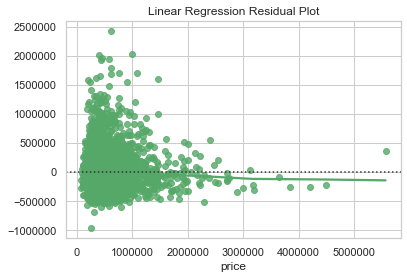

In [186]:
sns.residplot(y_test, y_kbest,lowess=True, color="g")
plt.title("Linear Regression Residual Plot", fontsize = 12)
plt.savefig('images/LR.png', bbox_inches = "tight");

## Generating Log Transformations and Interaction Features

In [171]:
data_log = pd.DataFrame([])
data_log['log_above'] = np.log(training_data['sqft_above'])
data_log['log_living'] = np.log(training_data['sqft_living'])
data_log['log_living15'] = np.log(training_data['sqft_living15'])
data_log['log_lot'] = np.log(training_data['sqft_lot'])
data_log['log_lot15'] = np.log(training_data['sqft_lot15'])
# data_log.hist(figsize  = [6, 6]);

In [178]:
# Introducing the log transformed contineous features to the dataset. 
data_fin_dummies = pd.merge(data_fin, data_log, how = "outer", left_index=True, right_index=True)

#### Removing original contineous features to reduce corralation. since log_living (and other logs) are derived from these features, leaving them in would cause a issue of colinearity.

In [179]:
 data_fin_dummies.drop(columns = ['price','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above'], inplace = True)

In [180]:
data_fin_dummies

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,house_years,house_age_2015,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,log_above,log_living,log_living15,log_lot,log_lot15
0,4,2.25,2.0,0,0,4,8,0,98058,47.4388,-122.162,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10,1986,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.635304,7.635304,7.779049,9.093020,8.948976
1,4,1.75,1.0,0,0,4,7,800,98058,47.4492,-122.084,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.130899,7.625595,7.727535,11.456620,10.768064
2,3,1.75,2.0,0,0,4,6,0,98058,47.4572,-122.180,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.625595,7.625595,7.090077,9.109967,9.109967
3,2,1.00,1.0,0,0,3,6,0,98058,47.4572,-122.184,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3,1957,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.813445,6.813445

In [181]:
X = data_fin_dummies
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

log_model = LinearRegression() # model

log_model.fit(X_train, y_train) # fit

y_pred = log_model.predict(X_test) # prediction


r_square = metrics.r2_score(y_test, y_pred)

mae = metrics.median_absolute_error(y_test, y_pred)



print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  -0.011982614669982405
Root Mean Squared Error:  209317.3118963744


In [182]:
#from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=72)

selector.fit(X_train, y_train)

SelectKBest(k=72, score_func=<function f_regression at 0x1a15de7730>)

In [183]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [184]:
#instantiate a linear regression object
lm_klogs = LinearRegression()

#fit the linear regression to the data
lm_klogs = lm_klogs.fit(X_train[selected_columns], y_train)

y_train_klogs = lm_klogs.predict(X_train[selected_columns])


trainKlogs_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_klogs))


print('Training Root Mean Squared Error:' , trainKlogs_rmse)

y_klogs = lm_klogs.predict(X_test[selected_columns])

testKlogs_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_klogs))

print('Testing Root Mean Squared Error:' , testKlogs_rmse)

Training Root Mean Squared Error: 374220.51808212727
Testing Root Mean Squared Error: 366697.0185985262


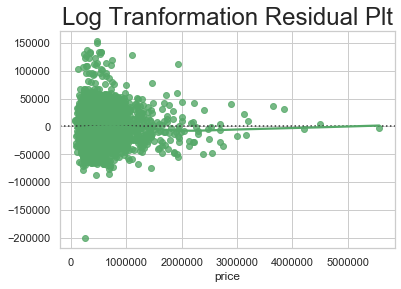

In [185]:
sns.residplot( y_test, y_klogs,lowess=True, color="g")
plt.title("Log Tranformation Residual Plot", fontsize = 12)
plt.savefig('images/Log.png', bbox_inches = "tight");

# Generating Polynomial and Interaction Features based on data_fin.
#### so far data_fin has a Training Root Mean Squared Error: 373014.63690137997 and training Training:  373014 vs. Testing:  367719. Which is worse than the naive model

In [86]:
data_fin.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,miles_from_downtown,house_years,house_age_2015,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10,23.357742,1986,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,26.394534,1959,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,20.904034,1959,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3,20.729671,1957,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [87]:
poly_2_data=data_fin.drop(columns = "price")
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(data_fin.drop(columns = "price"))
poly2_columns = poly_2.get_feature_names(poly_2_data.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,miles_from_downtown,house_years,house_age_2015,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms full_time_earnings,bedrooms part_time_earnings,bedrooms no_earnings,bedrooms car_truck_van,bedrooms public_transportation,bedrooms taxi,bedrooms motorcycle,bedrooms bike_walk_other,bedrooms work_home,bedrooms less_than_hs,bedrooms high_school_grad,bedrooms associates,bedrooms bachelors,bedrooms masters,bedrooms professional_school_degree,bedrooms doctorate,bedrooms public_school_enrollment,bedrooms private_school_enrollment,bedrooms no_school_enrollment,bedrooms for_rent,bedrooms rented_and_unoccupied,bedrooms for_sale_only,bedrooms sold_and_unoccupied,bedrooms seasonal_or_rec_use,bedrooms migrant_worker_housing,bedrooms vacant_other_reasons,bedrooms in_occupied_housing_units,bedrooms adult_correctional_facility,bedrooms juvenile_facilities,bedrooms nursing_facilities,bedrooms other_institutional,bedrooms military_quarters,bedrooms other_noninstitutional,bedrooms house_owned_with_mortgage,bedrooms house_owned_outright,bedrooms renter_occupied_housing,bedrooms vacant_households,bedrooms husband_and_wife_house,bedrooms single_guardian,bedrooms singles,bedrooms singles_with_roommate,bedrooms male,bedrooms female,bedrooms median_age,bedrooms male_median_age,bedrooms female_median_age,bedrooms population,bedrooms population_density_per_sq_mile,bedrooms total_housing_units,bedrooms median_home_value,bedrooms land_area,bedrooms water_area_sq_mile,bedrooms occupied_housing_units,bedrooms median_household_income,bedrooms month,bedrooms miles_from_downtown,bedrooms house_years,bedrooms house_age_2015,bedrooms zipcode_98002,bedrooms zipcode_98003,bedrooms zipcode_98004,bedroom

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, prices, random_state=30,test_size=0.2)

In [89]:
# from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=1000)

selector.fit(X_train, y_train)

SelectKBest(k=1000, score_func=<function f_regression at 0x1a15de7730>)

In [90]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [92]:
#instantiate a linear regression object
lm_poly2 = LinearRegression()

#fit the linear regression to the data
lm_poly2 = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_poly2 = lm_kbest.predict(X_train[selected_columns])


poly2_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_poly2))


print('Training Root Mean Squared Error:' , poly2_rmse)

y_poly2 = lm_poly2.predict(X_test[selected_columns])

poly2_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_poly2))

print('Testing Root Mean Squared Error:' , poly2_rmse)


Training Root Mean Squared Error: 368634.07833383384
Testing Root Mean Squared Error: 368247.13265258906


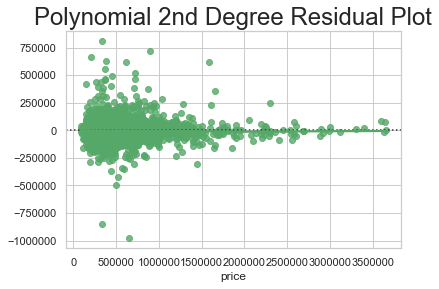

In [93]:
sns.residplot( y_test, y_poly2,lowess=True, color="g")
plt.title("Polynomial 2nd Degree Residual Plot", fontsize = 12)
plt.savefig('images/poly.png', bbox_inches = "tight");

# Linear Regression with SelectKBest produced the least RMSE value. Therefore, the modeling for the holdout dataset prediction will be made on the Linear Regression with SelectKBest. 

In [187]:
prices = pd.DataFrame(data_fin["price"])
prices.to_csv("datasets/prices.csv")
prices = pd.read_csv("datasets/prices.csv", index_col = 0)
data_fin.drop(columns = "price", inplace = True)


In [188]:
data_fin.shape

(17290, 142)

In [189]:
X = data_fin
y = prices.price


multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X, y) # fit



# y_pred = multi_lr_model.predict(holdout) # prediction



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:

selector = SelectKBest(f_regression, k=100)

selector.fit(X, y);

In [191]:
selected_columns = X.columns[selector.get_support()]
removed_columns = X.columns[~selector.get_support()]


In [192]:
len(selected_columns)

100

In [193]:
data_fin[selected_columns].to_csv("final_data.csv")

In [194]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final.fit(data_fin[selected_columns], prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
lm_final.coef_

array([[-2.69241824e+04,  2.66487453e+04,  1.16326975e+02,
         2.06540607e-01, -4.72520757e+04,  6.69557846e+05,
         5.53859017e+04,  5.71139815e+04,  9.63381581e+01,
         1.99888458e+01, -9.14732057e+02,  2.33072052e+05,
         7.65273799e+00, -6.46395739e-02, -2.06878075e+02,
        -2.47124264e+02, -1.09328075e+02,  2.56651406e+02,
         1.09012462e+02,  1.56615610e+02, -1.91794219e+02,
         3.94719189e+01, -1.06650119e+01,  1.40172470e+02,
        -1.12631529e+02,  1.03092351e+02,  1.27631540e+02,
         2.22918796e+02, -7.30907236e+01, -1.22153147e+02,
         9.86403411e+01,  1.01753342e+03, -1.73178231e+02,
         5.68755550e+02,  4.69882123e+03,  6.49473648e+02,
        -7.12114935e+03, -6.04306097e+01, -2.32541967e+01,
        -1.69018637e+02,  8.01992514e+02, -3.46452563e+01,
        -7.15133194e+01, -7.87384433e+01, -4.20174349e+02,
         2.74368397e+01, -5.44721323e+02,  4.44105834e+01,
         2.71577403e+02, -8.18159338e+01,  1.93466195e+0

In [196]:
import pickle


pickle_out = open("lm_final.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()